In [1]:
import pymongo
import numpy as np
import pandas as pd
from pandas import DataFrame
uri="mongodb://localhost:27017"
cx=pymongo.MongoClient(uri)
mndb = cx["BD_proyecto"]
mycol = mndb['bbdd1']
null = 'null' 

In [2]:
for inst in mycol.aggregate([{ "$group": {"_id": null,"MaximumValue": { "$max": "$Date" }}}]):
    fecmax=inst ['MaximumValue']
print(fecmax) 

2021-03-15


In [3]:
list_emp = []
for inst in  mycol.distinct( "Desc" ) : 
    list_emp.append(inst) 
    
print(list_emp)    

['AMZN', 'BTC_USD', 'FB', 'GOOG', 'MSFT']


In [4]:
def descarga_bbdd(emp):
    listn=[]
    for inst in mycol.find( { "Desc":emp } , {"_id": 0,"Close":1,"Date":1,"Desc":1}):
        listn.append(inst)
    return listn

n=0  
descarga=[]
for i in  list_emp: 
    emp = list_emp[n]
    print(emp)
    lista=descarga_bbdd(emp)
    descarga.append(lista)
#    print(lista)
    n+=1

AMZN
BTC_USD
FB
GOOG
MSFT


In [5]:
amzn_df = DataFrame (descarga[0])
btc_usd_df = DataFrame (descarga[1])
fb_df = DataFrame (descarga[2])
goog_df = DataFrame (descarga[3])
msft_df = DataFrame (descarga[4])

In [6]:
amzn_df.drop(['Desc'] , axis = 1, inplace = True)   
btc_usd_df.drop(['Desc'] , axis = 1, inplace = True)   
fb_df.drop(['Desc'] , axis = 1, inplace = True)   
goog_df.drop(['Desc'] , axis = 1, inplace = True)   
msft_df.drop(['Desc'] , axis = 1, inplace = True)  

In [7]:
#amzn_df2   = amzn_df.rename(columns = {"Close" : "Close"+ list_emp[0]})
#btc_usd_df2=btc_usd_df.rename(columns = {"Close" : "Close"+ list_emp[1]})  
#fb_df2     = fb_df.rename(columns = {"Close" : "Close"+ list_emp[2]})
#goog_df2   = goog_df.rename(columns = {"Close" : "Close"+ list_emp[3]})
#msft_d2f   = msft_df.rename(columns = {"Close" : "Close"+ list_emp[4]})
amzn_cierre   = amzn_df.rename(columns = {"Close" : "Close"+ list_emp[0]})
btc_usd_cierre=btc_usd_df.rename(columns = {"Close" : "Close"+ list_emp[1]})  
fb_cierre     = fb_df.rename(columns = {"Close" : "Close"+ list_emp[2]})
goog_cierre   = goog_df.rename(columns = {"Close" : "Close"+ list_emp[3]})
msft_cierre   = msft_df.rename(columns = {"Close" : "Close"+ list_emp[4]})

In [8]:
 # Establecer el índice en la columna Date para cada archivo
goog_cierre.set_index('Date', inplace = True)
fb_cierre.set_index('Date', inplace = True)
amzn_cierre.set_index('Date', inplace = True)
msft_cierre.set_index('Date', inplace = True)
btc_usd_cierre.set_index('Date', inplace = True)

In [9]:
# Integración de todos los dataframe en uno solo dataframe
df_combinado = btc_usd_cierre.join(goog_cierre).join(amzn_cierre).join(fb_cierre).join(msft_cierre)
df_combinado.head()

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2014-09-17,457.334015,583.168884,324.000000,76.430000,46.520000
2014-09-18,424.440002,587.656616,325.000000,77.000000,46.680000
2014-09-19,394.795990,594.447937,331.320007,77.910004,47.520000
2014-09-20,408.903992,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN


In [10]:
df_combinado.describe().transpose()

,count,unique,top,freq
CloseBTC_USD,2371,2368,6741.750000,2
CloseGOOG,1634,1618,629.250000,2
CloseAMZN,1634,1619,1855.319946,2
CloseFB,1634,1549,178.919998,3
CloseMSFT,1634,1497,62.299999,4


In [11]:
# Dado que los valores perdidos que hay en data set se corresponden con días donde no hay cotización de las acciones 
# En la bolsa de valores, estos serán sustitudios por el último valor válido, para ello usaremos el método de pandas ffill()
# que propaga el último valor valido hacia adelante, así si el último valor valido fue de un viernes, ese valor se asignará
# al sábado y al domingo

df_combinado = df_combinado.ffill()
df_combinado.head(n=10)

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2014-09-17,457.334015,583.168884,324.000000,76.430000,46.520000
2014-09-18,424.440002,587.656616,325.000000,77.000000,46.680000
2014-09-19,394.795990,594.447937,331.320007,77.910004,47.520000
2014-09-20,408.903992,594.447937,331.320007,77.910004,47.520000
2014-09-21,398.821014,594.447937,331.320007,77.910004,47.520000
2014-09-22,402.152008,585.761780,324.500000,76.800003,47.060001
2014-09-23,435.790985,579.538879,323.630005,78.290001,46.560001
2014-09-24,423.204987,586.380066,328.209991,78.540001,47.080002
2014-09-25,411.574005,573.485474,321.929993,77.220001,46.040001


In [12]:
df_combinad2   = df_combinado.astype(float) 
#goog_cierre    = goog_df2['CloseGOOG'].astype(float) 
#fb_cierre      = fb_df2['CloseFB'].astype(float) 
#amzn_cierre    = amzn_df2['CloseAMZN'].astype(float) 
#msft_cierre    = msft_d2f['CloseMSFT'].astype(float) 
#btc_usd_cierre = btc_usd_df2['CloseBTC_USD'].astype(float) 
print(df_combinad2.dtypes)

CloseBTC_USD    float64
CloseGOOG       float64
CloseAMZN       float64
CloseFB         float64
CloseMSFT       float64
dtype: object


In [13]:
#print(df_combinado)
df2 = df_combinad2[df_combinado['CloseFB'] == 0]
df2

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,


<AxesSubplot:>

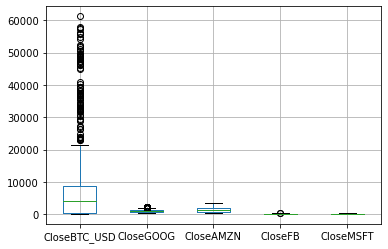

In [14]:
df_combinad2.boxplot()

<AxesSubplot:xlabel='Date'>

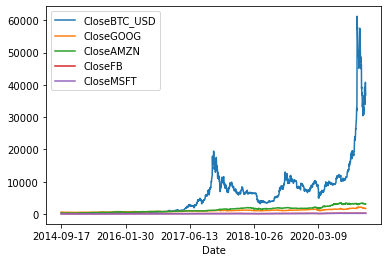

In [15]:
df_combinad2.loc[:, ['CloseBTC_USD','CloseGOOG','CloseAMZN','CloseFB','CloseMSFT']].plot()

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

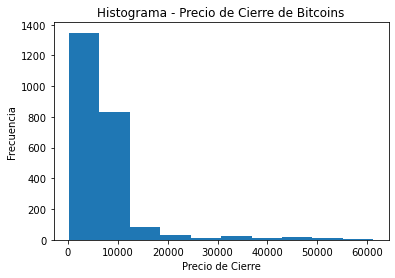

In [17]:


plt.hist(x=df_combinad2.iloc[:,0])
plt.title('Histograma - Precio de Cierre de Bitcoins')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



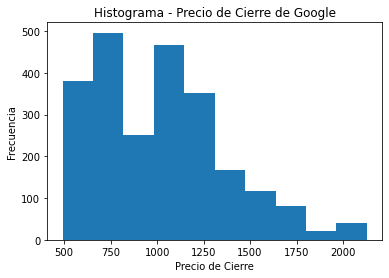

In [18]:
plt.hist(x=df_combinad2.iloc[:,1])
plt.title('Histograma - Precio de Cierre de Google')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

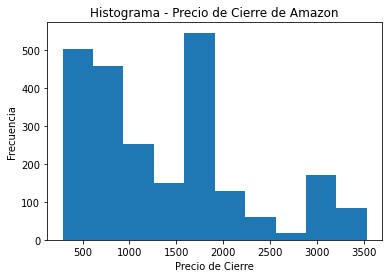

In [19]:
plt.hist(x=df_combinad2.iloc[:,2])
plt.title('Histograma - Precio de Cierre de Amazon')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

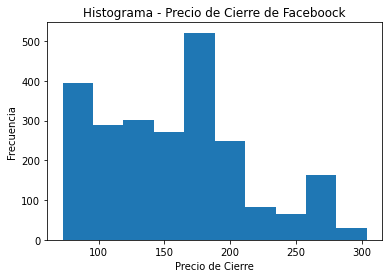

In [20]:


plt.hist(x=df_combinad2.iloc[:,3])
plt.title('Histograma - Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



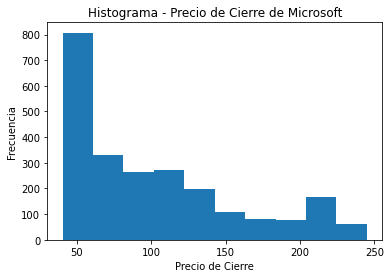

In [21]:
plt.hist(x=df_combinad2.iloc[:,4])
plt.title('Histograma - Precio de Cierre de Microsoft')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

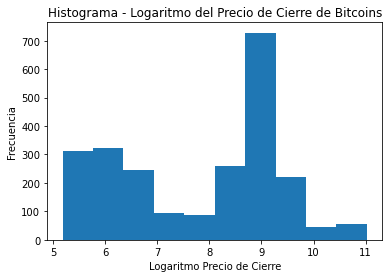

In [22]:
plt.hist(x=np.log(df_combinad2.iloc[:,0]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Bitcoins')
plt.xlabel('Logaritmo Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

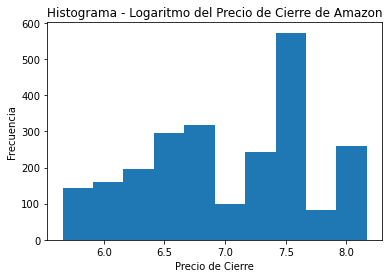

In [23]:


plt.hist(x=np.log(df_combinad2.iloc[:,2]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Amazon')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



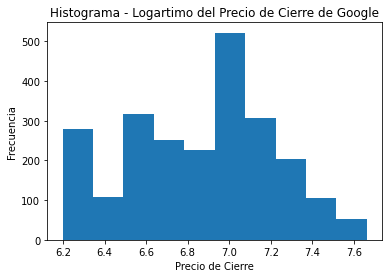

In [24]:


plt.hist(x=np.log(df_combinad2.iloc[:,1]))
plt.title('Histograma - Logartimo del Precio de Cierre de Google')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



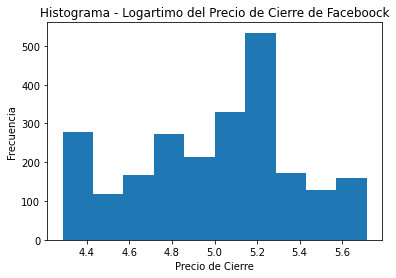

In [25]:
plt.hist(x=np.log(df_combinad2.iloc[:,3]))
plt.title('Histograma - Logartimo del Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

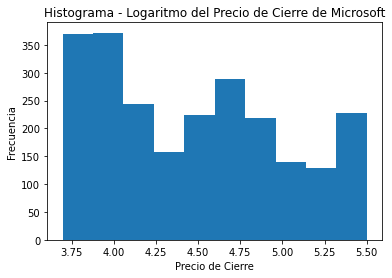

In [26]:


plt.hist(x=np.log(df_combinad2.iloc[:,4]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Microsoft')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()



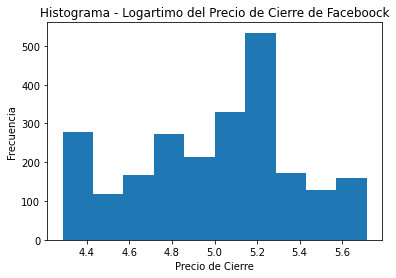

In [27]:
plt.hist(x=np.log(df_combinad2.iloc[:,3]))
plt.title('Histograma - Logartimo del Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:>

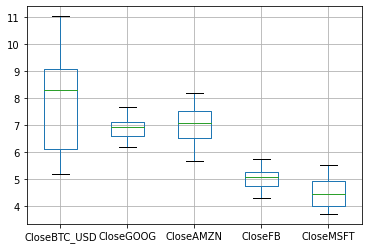

In [28]:
df_combinad2_log = np.log(df_combinad2)

df_combinad2_log.loc[:, ['CloseBTC_USD','CloseGOOG','CloseAMZN','CloseFB','CloseMSFT']].boxplot()

<AxesSubplot:xlabel='Date'>

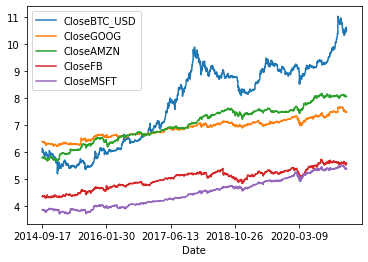

In [29]:
df_combinad2_log.loc[:,  ['CloseBTC_USD','CloseGOOG','CloseAMZN','CloseFB','CloseMSFT']].plot()

In [30]:
df_combinad2_log.head()

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2014-09-17,6.125414,6.368477,5.780744,4.336375,3.839882
2014-09-18,6.050771,6.376143,5.783825,4.343805,3.843316
2014-09-19,5.978369,6.387633,5.803085,4.355554,3.861151
2014-09-20,6.013480,6.387633,5.803085,4.355554,3.861151
2014-09-21,5.988513,6.387633,5.803085,4.355554,3.861151


In [31]:
df_combinad2_log.tail()

,CloseBTC_USD,CloseGOOG,CloseAMZN,CloseFB,CloseMSFT
Date,,,,,
2021-01-10,10.554678,7.476880,8.043731,5.548453,5.382153
2021-01-09,10.602978,7.476880,8.043731,5.548453,5.382153
2021-01-08,10.616379,7.499539,8.065485,5.589381,5.391899
2021-01-07,10.580786,7.488433,8.059011,5.593744,5.385824
2021-01-06,10.513915,7.458930,8.051462,5.573332,5.357765
